# Part 2: BASIS FUNCTION

## 1.Generate 50 2D-data points using the following function:$y=sin(x^2+1)$

## 2.Add Gaussian random noise to the data

start...
f:          3         2
-0.9384 x + 1.133 x - 0.1204 x + 0.8459


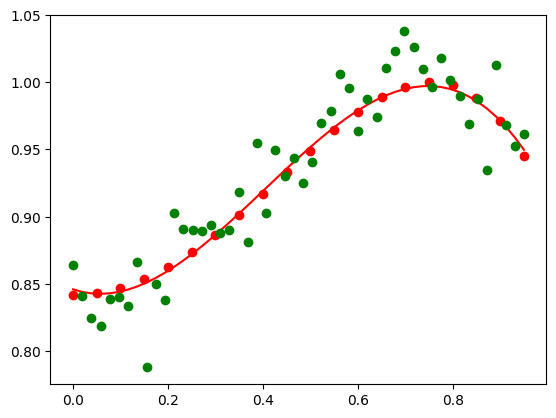

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

def actual_distribution():
    x=np.arange(0,1,0.05);
    y=np.sin(np.power(x,2)+1)
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=0.03
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

def numpy_poly_fitting(x,y,M):
    z=np.polyfit(x,y,M)
    f=np.poly1d(z)
    return f

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.show()
    

## 3.Fit the generated noisy data using the MLE that employs the Gaussian basis functions as discussed in class.
## 4.Show your results for different values of M that generate overfitting and underfitting curves.

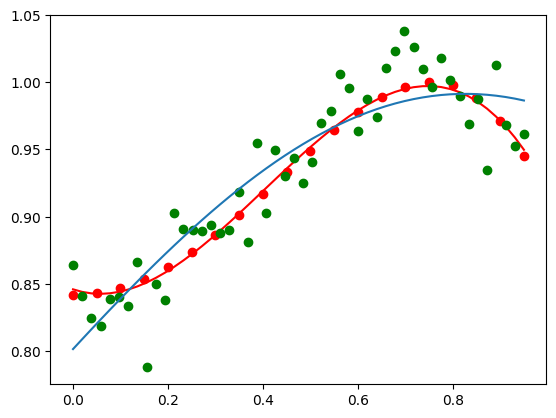

In [2]:
def Gaussian_basis_Func(x,mu,s):
    G = np.exp(-np.power((x-mu),2)/(2*s*s))
    return G

def my_G_B_FUNC_fitting(x,y,M,s):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[0]=1
            else:
                mu = m/(M+1)
                fai[m]=Gaussian_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)#矩阵相乘
    imxx=linalg.inv(mxx)#direct inverse calculation
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    y=np.dot(mx,w)
    return x,y

#===============================================

#estimate the curve from the noisy data
[x_est,y_est]=my_G_B_FUNC_fitting(x_noise,y_noise,M=2,s=1)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()



## 5.Change the basis functions to the sigmoid basis functions, and show the results for different values of M that generate overfitting and underfitting curves.

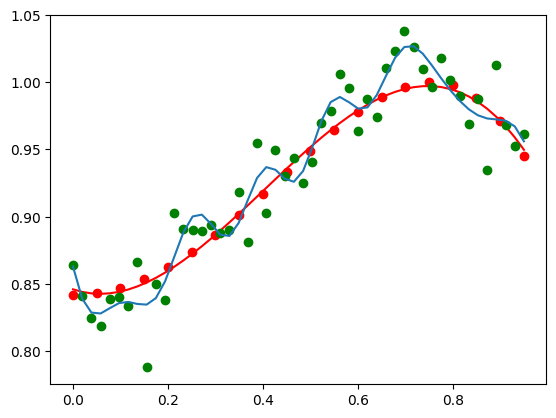

In [3]:
def Sigmoid_basis_Func(x,mu,s):
    S = 1/(1+np.exp((mu-x)/s))
    return S
    
def my_S_B_FUNC_fitting(x,y,M,s):
    N=len(x)
    mx=np.zeros([N,M+1])
    vy=np.zeros([N,1])
    fai=np.zeros([M+1,1])
    
    for n in range(0,N):
        for m in range(0,M+1):
            if m == 0:
                fai[m]=1
            else:
                mu = m/(M+1)
                fai[m]=Sigmoid_basis_Func(x[n],mu,s)
            mx[n][m]=np.power(fai[m],1)
        vy[n][0]=y[n]
    
    mxx=np.dot(mx.T,mx)#矩阵相乘
    imxx=linalg.inv(mxx)#direct inverse calculation
    tmp=np.dot(imxx,mx.T)
    w=np.dot(tmp,vy)
    y=np.dot(mx,w)
    return x,y

#===============================================

#estimate the curve from the noisy data
[x_est,y_est]=my_S_B_FUNC_fitting(x_noise,y_noise,M=15,s=0.1)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()

## 6.Change the original curve function to $y=0.4345x^3-5.607x^2+16.78x-10.61$ , and use the sigmoid basis function to estimate the best curve fitting from the noisy data.

start...
f:         3         2
0.4345 x - 5.607 x + 16.78 x - 10.61


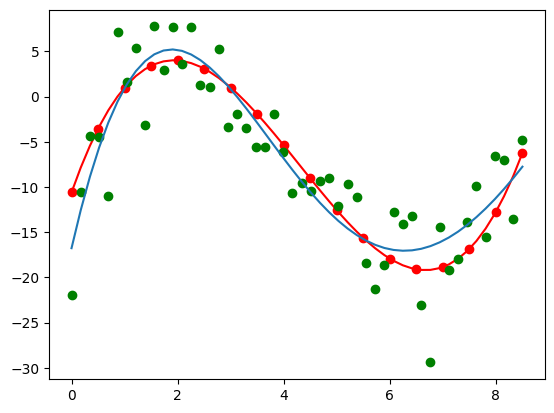

In [4]:
def actual_distribution_2():
    x=np.arange(0,9,0.5);
    y=0.4345*np.power(x,3)-5.607*np.power(x,2)+16.78*x-10.61
    return x,y

def add_noise(y_curve):
    mu=0
    sigma=4.0
    noise=np.random.normal(mu,sigma,len(y_curve))
    y_noise=y_curve+noise
    return y_noise

#===============================================

print('start...')
#generate true data
x_true,y_true = actual_distribution_2()

#fit on the actual data
f=numpy_poly_fitting(x_true,y_true,M=3)
print('f:',f)
x_curve=np.linspace(x_true[0],x_true[-1],50)
y_curve=f(x_curve)

#add noise on the true data
y_noise=add_noise(y_curve)
x_noise=x_curve

#estimate the curve from the noisy data
[x_est,y_est]=my_S_B_FUNC_fitting(x_noise,y_noise,M=4,s=4)

#show plot
plt.plot(x_true,y_true,'ro')
plt.plot(x_curve,y_curve,'red')
plt.plot(x_noise,y_noise,'go')
plt.plot(x_est,y_est)
plt.show()


## 7.Experiment with different parameters of the Gaussian and sigmoid basis functions, and then show the plot. Also, discuss the advantages of these basis functions over polynomial functions.

The advantages of these basis functions over polynomial functions are as follow:
1. 